<center><h1><b>Quora Insincere Questions Classification Using Neural Networks and Deep Learning Models</b></h1></center>


Outline:
1. Dowload data from Kaggle to google Colab

2. Prepare the data for Modeling using the TF-IDF Technique

3. Train a deep learning model using `PyTorch` package

## Download Data from Kaggle

In [15]:
!ls

data  kaggle.json  sample_data


In [16]:
!pwd

/content


In [17]:
import os

In [18]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [19]:
!kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p data
!kaggle competitions download -c quora-insincere-questions-classification -f test.csv -p data
!kaggle competitions download -c quora-insincere-questions-classification -f sample_submission.csv -p data

  0% 0.00/54.9M [00:00<?, ?B/s]
100% 54.9M/54.9M [00:00<00:00, 1.18GB/s]
  0% 0.00/15.8M [00:00<?, ?B/s]
100% 15.8M/15.8M [00:00<00:00, 1.08GB/s]
  0% 0.00/4.09M [00:00<?, ?B/s]
100% 4.09M/4.09M [00:00<00:00, 725MB/s]


In [20]:
train_fname = 'data/train.csv.zip'
test_fname = 'data/test.csv.zip'
sample_fname = 'data/sample_submission.csv.zip'

In [21]:
import pandas as pd

In [22]:
raw_df = pd.read_csv(train_fname)
test_df = pd.read_csv(test_fname)
sub_df = pd.read_csv(sample_fname)

In [23]:
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [24]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [25]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [26]:
raw_df.sample(10)

,qid,question_text,target
1160379,e35cd5cb7b7059afa0cc,"I wanted a girl, but we got a boy. Can I just ...",1
182664,23b3cd3ce4634c44ae7b,How do you not get a boner when she sits on my...,0
802089,9d2b2fa19a425cb6c535,What has prevented online IDE's from taking off?,0
152576,1dd9da7d3bd3ccb864bb,What is the importance of Mansfield Training S...,0
798427,9c73d0add5cb2584b187,What and where can you get the best weather in...,0
1049138,cd92927c4ccc42df4b8c,Why does the UK make a fuss about Russia who h...,1
1011557,c638c24ef350cedeb90f,Why AIDs is called syndrome?,0
1145807,e08114f93ec017f9c70a,Can I have some help with my MBTI type?,0
773493,9786bf91e30d543066a9,What is planning and explain its process?,0
493835,60b1c25b2d7e4ef5567f,Does Uber drivers pick up people when it snows?,0


## Data Exploration

In [27]:
SAMPLE_SIZE = 100_000
sample_df = raw_df.sample(SAMPLE_SIZE)

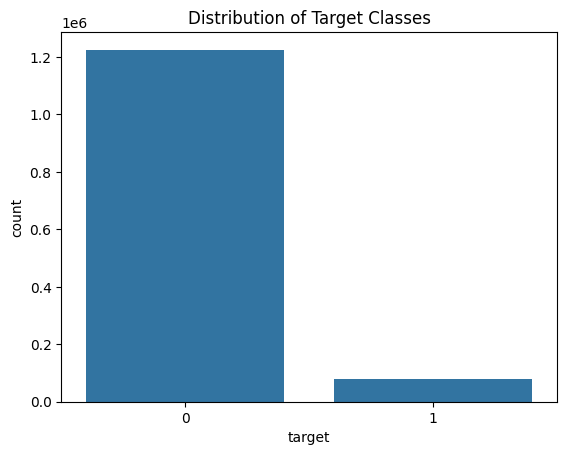

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=raw_df)
plt.title('Distribution of Target Classes')
plt.show()

In [29]:
# Add character count column if not already added
raw_df['char_count'] = raw_df['question_text'].apply(len)

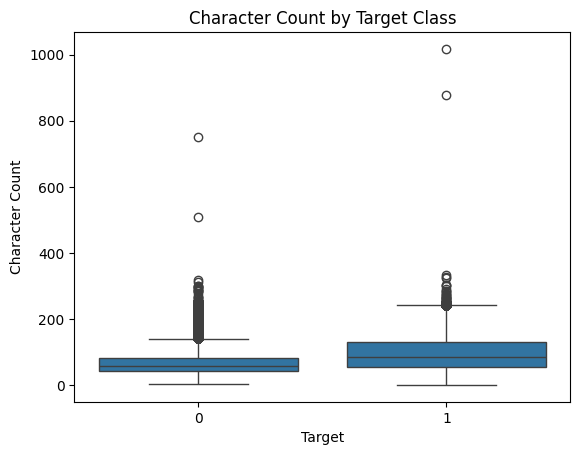

In [30]:
# Box plot of character count by target class
sns.boxplot(x='target', y='char_count', data=raw_df)
plt.title('Character Count by Target Class')
plt.xlabel('Target')
plt.ylabel('Character Count')
plt.show()


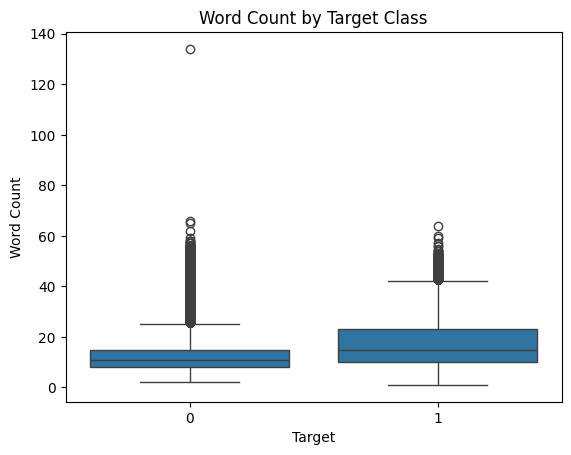

In [31]:
# Add word count column
raw_df['word_count'] = raw_df['question_text'].apply(lambda x: len(x.split()))

# Box plot of word count
sns.boxplot(x='target', y='word_count', data=raw_df)
plt.title('Word Count by Target Class')
plt.xlabel('Target')
plt.ylabel('Word Count')
plt.show()


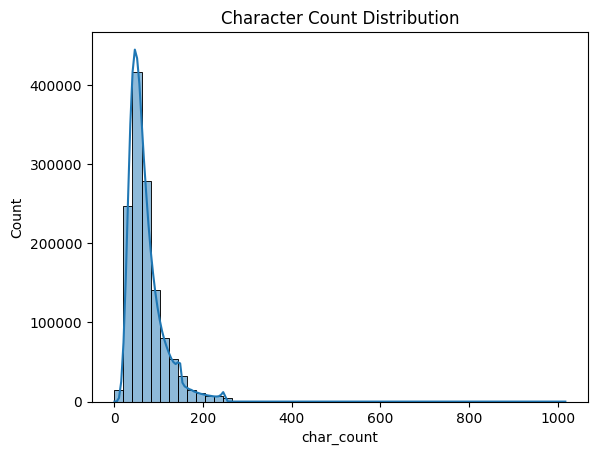

In [32]:
raw_df.char_count = raw_df['question_text'].apply(len)
raw_df.word_count = raw_df['question_text'].apply(lambda x: len(x.split()))

# Plot distributions
sns.histplot(raw_df.char_count, bins=50, kde=True)
plt.title('Character Count Distribution')
plt.show()


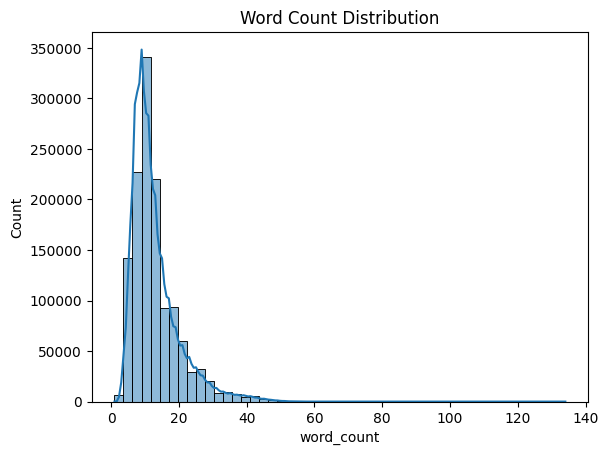

In [33]:
sns.histplot(raw_df.word_count, bins=50, kde=True)
plt.title('Word Count Distribution')
plt.show()

In [34]:
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def get_top_n_words(corpus, n=None):
    words = ' '.join(corpus).lower().split()
    words = [word for word in words if word not in stop_words]
    return Counter(words).most_common(n)

top_words = get_top_n_words(sample_df['question_text'], n=20)
print(top_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[('get', 4741), ('best', 4710), ('would', 4570), ('people', 3833), ('like', 3295), ('good', 2851), ('one', 2286), ('make', 2116), ('think', 1964), ('many', 1869), ('someone', 1663), ('much', 1663), ('use', 1584), ('want', 1481), ('know', 1420), ('way', 1403), ('take', 1342), ('find', 1330), ('ever', 1325), ('india?', 1308)]


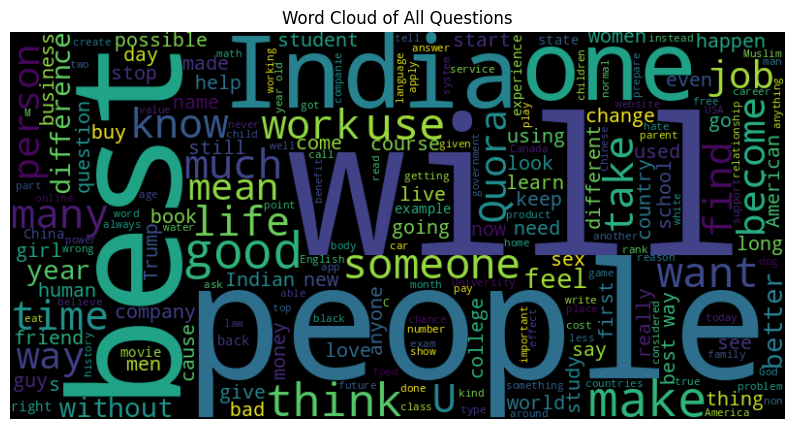

In [35]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400).generate(' '.join(sample_df['question_text']))
plt.figure(figsize=(10, 11))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Questions")
plt.show()


In [36]:
raw_df.question_mark = sample_df['question_text'].apply(lambda x: '?' in x)
raw_df

<ipython-input-36-d02c7e5e2bf1>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  raw_df.question_mark = sample_df['question_text'].apply(lambda x: '?' in x)


,qid,question_text,target,char_count,word_count
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,72,13
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,81,16
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,67,10
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,57,9
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,77,15
...,...,...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0,93,17
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0,91,19
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0,25,4
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0,71,13


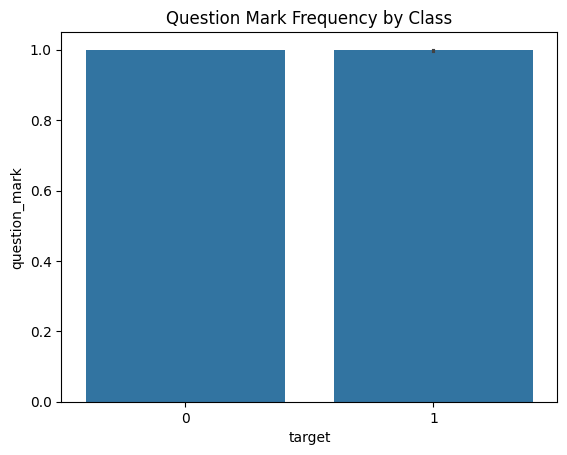

In [37]:
# Presence of question mark
raw_df['question_mark'] = raw_df['question_text'].apply(lambda x: '?' in x)

sns.barplot(x='target', y='question_mark', data=raw_df)
plt.title('Question Mark Frequency by Class')
plt.show()


In [38]:
sample_df

,qid,question_text,target
698326,88be88564885bfdb6fbf,Has there ever been a day without a war?,0
778611,988543e51caa189b6aac,Can anyone correct my resume?,0
1289902,fccd383577fa728ec857,Why is the media anti-white?,1
1217063,ee87808f3d5e96a4c4ad,Is there any globally successful startup/compa...,0
1038406,cb77eef90150943dcab0,What is the best website for finding the box o...,0
...,...,...,...
582101,720e8fe929eef3074c1e,Guys can you suggest a nice parlour or a makeu...,0
1303936,ff918f8df65246714b5e,"If batsman were to have a political party, whi...",0
292694,3950a354406b4f3f45f6,How do Indians pay off their educational loan ...,0
147814,1ce870f936e9849552a6,Which affordable devices would allow me to hea...,0


In [39]:
sample_df.target.value_counts(normalize=True)

,proportion
target,
0,0.93788
1,0.06212


## Prepare the Data for Training
- Convert text to TF-IDF Vectors

- Convert Vectors to PyyTorch tensors

- Create PyTorch Data Loaders

### Convert text to TF-IDF

In [40]:
import nltk

In [41]:
 nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [42]:
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

In [43]:
stemmer = SnowballStemmer(language='english')

In [44]:
stemmer.stem('going')

'go'

In [45]:
def tokenize(text):
  return[stemmer.stem(token) for token in word_tokenize(text) ]

In [46]:
tokenize('This is a set of butterfries unexpectedily!')

['this', 'is', 'a', 'set', 'of', 'butterfri', 'unexpectedili', '!']

In [47]:
word_tokenize('This is something very new () in the field of data analysis.')

['This',
 'is',
 'something',
 'very',
 'new',
 '(',
 ')',
 'in',
 'the',
 'field',
 'of',
 'data',
 'analysis',
 '.']

In [48]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
english_stopwords = stopwords.words('english')

In [50]:
','.join(english_stopwords)

"a,about,above,after,again,against,ain,all,am,an,and,any,are,aren,aren't,as,at,be,because,been,before,being,below,between,both,but,by,can,couldn,couldn't,d,did,didn,didn't,do,does,doesn,doesn't,doing,don,don't,down,during,each,few,for,from,further,had,hadn,hadn't,has,hasn,hasn't,have,haven,haven't,having,he,he'd,he'll,her,here,hers,herself,he's,him,himself,his,how,i,i'd,if,i'll,i'm,in,into,is,isn,isn't,it,it'd,it'll,it's,its,itself,i've,just,ll,m,ma,me,mightn,mightn't,more,most,mustn,mustn't,my,myself,needn,needn't,no,nor,not,now,o,of,off,on,once,only,or,other,our,ours,ourselves,out,over,own,re,s,same,shan,shan't,she,she'd,she'll,she's,should,shouldn,shouldn't,should've,so,some,such,t,than,that,that'll,the,their,theirs,them,themselves,then,there,these,they,they'd,they'll,they're,they've,this,those,through,to,too,under,until,up,ve,very,was,wasn,wasn't,we,we'd,we'll,we're,were,weren,weren't,we've,what,when,where,which,while,who,whom,why,will,with,won,won't,wouldn,wouldn't,y,you,you'd,you

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
vectorizer = TfidfVectorizer(tokenizer=tokenize, stop_words=english_stopwords, max_features=1000)

In [53]:
sample_df.question_text

,question_text
698326,Has there ever been a day without a war?
778611,Can anyone correct my resume?
1289902,Why is the media anti-white?
1217063,Is there any globally successful startup/compa...
1038406,What is the best website for finding the box o...
...,...
582101,Guys can you suggest a nice parlour or a makeu...
1303936,"If batsman were to have a political party, whi..."
292694,How do Indians pay off their educational loan ...
147814,Which affordable devices would allow me to hea...


In [54]:
%%time
vectorizer.fit(sample_df.question_text)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'m", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


CPU times: user 25.5 s, sys: 81.1 ms, total: 25.6 s
Wall time: 25.8 s


TfidfVectorizer(max_features=1000,
                stop_words=['a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...],
                tokenizer=<function tokenize at 0x7de1ac353060>)

In [55]:
vectorizer.get_feature_names_out()[:100]

array(['!', '$', '%', '&', "'", "''", "'m", "'s", '(', ')', ',', '-', '.',
       '1', '10', '100', '12', '12th', '15', '2', '20', '2017', '2018',
       '3', '30', '4', '5', '6', '7', '8', ':', ';', '?', '[', ']', '``',
       'abl', 'abroad', 'abus', 'accept', 'accomplish', 'accord',
       'account', 'achiev', 'acid', 'act', 'action', 'activ', 'actual',
       'ad', 'add', 'address', 'admiss', 'adult', 'advanc', 'advantag',
       'advic', 'affect', 'africa', 'african', 'age', 'air', 'allow',
       'almost', 'alon', 'along', 'alreadi', 'also', 'altern', 'alway',
       'amazon', 'america', 'american', 'among', 'amount', 'analysi',
       'android', 'ani', 'anim', 'anoth', 'answer', 'anyon', 'anyth',
       'apart', 'app', 'appear', 'appl', 'appli', 'applic', 'arab',
       'area', 'armi', 'around', 'art', 'asian', 'ask', 'associ',
       'atheist', 'attack', 'attend'], dtype=object)

## Transform the questionsin to Vectors

In [56]:
%%time
inputs = vectorizer.transform(sample_df.question_text)

CPU times: user 29.5 s, sys: 85.9 ms, total: 29.6 s
Wall time: 41.4 s


In [57]:
inputs.shape

(100000, 1000)

In [58]:
inputs

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 548657 stored elements and shape (100000, 1000)>

In [60]:
%%time
test_inputs = vectorizer.transform(test_df.question_text)

CPU times: user 1min 38s, sys: 263 ms, total: 1min 38s
Wall time: 1min 45s


In [61]:
test_inputs.shape

(375806, 1000)

## Split the Training and Validation Sets

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
targets = sample_df.target

In [64]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, targets, test_size=0.3)

In [65]:
train_inputs.shape

(70000, 1000)

In [66]:
val_inputs.shape

(30000, 1000)

In [67]:
train_targets

,target
347043,0
69345,0
307636,0
736907,0
505803,0
...,...
365416,0
1153260,0
1106181,0
406965,1


In [68]:
val_targets

,target
1071928,0
189575,0
1105409,0
1153268,0
498686,0
...,...
715043,0
1078557,0
849995,0
1093306,0


## Convert to PyTorch Tensors

In [69]:
import torch

In [70]:
#convert from a sparse matrix to numpy array using the command .toarray() and converting to float
train_input_tensors = torch.tensor(train_inputs.toarray()).float()
val_input_tensors = torch.tensor(val_inputs.toarray()).float()

In [71]:
train_input_tensors

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [72]:
train_input_tensors.shape

torch.Size([70000, 1000])

In [73]:
val_input_tensors

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [74]:
val_input_tensors.shape

torch.Size([30000, 1000])

In [75]:
# convert from pandas series to numpy array using the command .values
train_target_tensors = torch.tensor(train_targets.values).float()
val_target_tensors = torch.tensor(val_targets.values).float()

In [76]:
test_inputs_tensors = torch.tensor(test_inputs.toarray()).float()

## Create PyTorch Data Loaders

In [77]:
from torch.utils.data import TensorDataset, DataLoader

In [78]:
train_ds = TensorDataset(train_input_tensors, train_target_tensors)
val_ds = TensorDataset(val_input_tensors, val_target_tensors)
test_ds = TensorDataset(train_input_tensors)

In [79]:
train_ds[:10]

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]))

In [80]:
BATCH_SIZE = 128

In [81]:
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=BATCH_SIZE)
test_dl = DataLoader(test_ds, batch_size=BATCH_SIZE)

In [82]:
for batch in train_dl:
  batch_inputs = batch[0]
  batch_targets = batch[1]
  print('batch_inputs.shape', batch_inputs.shape)
  print('batch_targets.shape', batch_targets.shape)
  break

batch_inputs.shape torch.Size([128, 1000])
batch_targets.shape torch.Size([128])


In [83]:
len(train_dl)

547

In [84]:
# about 547 batches in the data loader

## Train Deep Learning Model

In [85]:
import torch.nn as nn
import torch.nn.functional as F

In [86]:
from sklearn.metrics import accuracy_score, f1_score

In [87]:
class QuoraNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(1000, 512)
    self.layer2 = nn.Linear(512, 256)
    self.layer3 = nn.Linear(256, 128)
    self.layer4 = nn.Linear(128, 1)
    pass
  def forward(self, inputs):
    out = self.layer1(inputs)
    out = F.relu(out)
    out = self.layer2(out)
    out = F.relu(out)
    out = self.layer3(out)
    out = F.relu(out)
    out = self.layer4(out)
    return out


In [88]:
model = QuoraNet()

In [89]:
for batch in train_dl:
  bi, bt = batch
  print('inputs.shape', bi.shape)
  print('targets.shape', bt.shape)

  bo = model(bi)
  print('bo.shape', bo.shape)

  # convert outputs to probabilities
  probs = torch.sigmoid(bo[:,0])
  print('probs', probs[:10])

  #convert probs to predictions
  preds = (probs > 0.5).int()
  print('preds', preds[:10])
  print('batch_targets', bt[:10])

   # check the metrics
  print('Accuracy score', accuracy_score(bt, preds))
  print('F1 score', f1_score(bt, preds))

  # Loss
  print('Loss', F.binary_cross_entropy(preds.float(), bt))

  break

inputs.shape torch.Size([128, 1000])
targets.shape torch.Size([128])
bo.shape torch.Size([128, 1])
probs tensor([0.5194, 0.5198, 0.5193, 0.5198, 0.5197, 0.5203, 0.5197, 0.5199, 0.5194,
        0.5194], grad_fn=<SliceBackward0>)
preds tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=torch.int32)
batch_targets tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Accuracy score 0.0625
F1 score 0.11764705882352941
Loss tensor(93.7500)


In [90]:
bi[:10]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [91]:
bi.shape

torch.Size([128, 1000])

In [92]:
bt[:10]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [93]:
bt.shape

torch.Size([128])

In [94]:
bo[:10]

tensor([[0.0778],
        [0.0794],
        [0.0771],
        [0.0792],
        [0.0790],
        [0.0814],
        [0.0789],
        [0.0798],
        [0.0778],
        [0.0778]], grad_fn=<SliceBackward0>)

In [95]:
bo.shape

torch.Size([128, 1])

In [96]:
# Evaluate model performance
def evaluate(model, dl):
  losses, accs, f1s = [], [], []

  # loop over batches
  for batch in dl:

    # Get inputs and targets
    inputs, targets = batch

    # Get outputs from the model
    outputs = model(inputs)

    # convert to probabilities
    probs = torch.sigmoid(outputs[:,0])

    # compute loss
    loss = F.binary_cross_entropy(probs, targets, weight=torch.tensor(20))

    # compute preds
    preds = (probs > 0.5).int()

    # compute accuracy and F1 scores
    acc = accuracy_score(targets, preds)
    f1 = f1_score(targets, preds)

    losses.append(loss)
    accs.append(acc)
    f1s.append(f1)

  return (torch.mean(torch.tensor(losses)).item(),
  torch.mean(torch.tensor(accs)).item(),
  torch.mean(torch.tensor(f1s)).item())


In [97]:
evaluate(model, train_dl)

(14.569594383239746, 0.06233268976211548, 0.11659551411867142)

In [98]:
evaluate(model, val_dl)

(14.570718765258789, 0.0616023950278759, 0.11535432934761047)

In [99]:
from operator import le
# Train the model batch by batch
def fit(epochs, lr, model, train_dl, val_dl):
  history = []
  optimizer = torch.optim.Adam(model.parameters(), lr, weight_decay=1e-5)

  for epoch in range(epochs):
    # Training phase of the model
    for batch in train_dl:

      # Get inputs and targets
      inputs, targets = batch

      # Get model outputs
      outputs = model(inputs)

      # Get probabilities
      probs = torch.sigmoid(outputs[:,0])

      # Compute loss
      loss = F.binary_cross_entropy(probs, targets, weight=torch.tensor(20))

      # Perform optimization
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    # Evaluation phase of the model
    loss, acc, f1 = evaluate(model, val_dl)
    print('Epoch: {}, Loss {:.4f}, Accuracy: {:.4f}, F1 Score: {:.4f}'.format(
        epoch+1, loss, acc, f1))
    history.append([loss, acc, f1])
  return history






In [100]:
fit(5, 0.001, model, train_dl, val_dl)

Epoch: 1, Loss 3.0325, Accuracy: 0.9467, F1 Score: 0.3763
Epoch: 2, Loss 2.9853, Accuracy: 0.9466, F1 Score: 0.4697
Epoch: 3, Loss 3.0938, Accuracy: 0.9465, F1 Score: 0.4281
Epoch: 4, Loss 3.6978, Accuracy: 0.9401, F1 Score: 0.4707
Epoch: 5, Loss 5.0176, Accuracy: 0.9413, F1 Score: 0.3865


[[3.0325143337249756, 0.9467087984085083, 0.37625959515571594],
 [2.985258102416992, 0.9466201066970825, 0.46973249316215515],
 [3.0937671661376953, 0.946465015411377, 0.42813000082969666],
 [3.6977956295013428, 0.9401373863220215, 0.47072505950927734],
 [5.017641544342041, 0.941278874874115, 0.3865043520927429]]

In [101]:
model = QuoraNet()

In [102]:
history = []

In [103]:
history.append(evaluate(model, val_dl))

In [104]:
history

[(13.628445625305176, 0.9383975863456726, 0.0)]

In [105]:
history+=fit(5, 0.001, model, train_dl, val_dl)

Epoch: 1, Loss 3.0401, Accuracy: 0.9467, F1 Score: 0.3589
Epoch: 2, Loss 2.9692, Accuracy: 0.9471, F1 Score: 0.4147
Epoch: 3, Loss 3.0927, Accuracy: 0.9466, F1 Score: 0.4385
Epoch: 4, Loss 3.5764, Accuracy: 0.9435, F1 Score: 0.4130
Epoch: 5, Loss 5.2443, Accuracy: 0.9423, F1 Score: 0.3825


In [106]:
history+=fit(10, 0.0001, model, train_dl, val_dl)

Epoch: 1, Loss 6.2347, Accuracy: 0.9409, F1 Score: 0.4125
Epoch: 2, Loss 6.7075, Accuracy: 0.9409, F1 Score: 0.4044
Epoch: 3, Loss 7.2378, Accuracy: 0.9421, F1 Score: 0.3946
Epoch: 4, Loss 7.5373, Accuracy: 0.9414, F1 Score: 0.4055
Epoch: 5, Loss 7.8296, Accuracy: 0.9414, F1 Score: 0.3978
Epoch: 6, Loss 8.0712, Accuracy: 0.9401, F1 Score: 0.4037
Epoch: 7, Loss 8.4957, Accuracy: 0.9418, F1 Score: 0.3945
Epoch: 8, Loss 8.6023, Accuracy: 0.9409, F1 Score: 0.3993
Epoch: 9, Loss 8.8351, Accuracy: 0.9413, F1 Score: 0.3915
Epoch: 10, Loss 8.9644, Accuracy: 0.9413, F1 Score: 0.3899


In [107]:
history

[(13.628445625305176, 0.9383975863456726, 0.0),
 [3.040128707885742, 0.9466533064842224, 0.3588787019252777],
 [2.9691834449768066, 0.9471187591552734, 0.41466566920280457],
 [3.092653751373291, 0.9466090202331543, 0.4384550154209137],
 [3.576354742050171, 0.9434618353843689, 0.41298264265060425],
 [5.244319915771484, 0.9423314929008484, 0.3824634552001953],
 [6.234730243682861, 0.9408577084541321, 0.4124663472175598],
 [6.70753288269043, 0.9409242272377014, 0.4043540358543396],
 [7.237814426422119, 0.9421210289001465, 0.3946104943752289],
 [7.537280082702637, 0.9413896203041077, 0.4055350422859192],
 [7.829644680023193, 0.9414228796958923, 0.3978162109851837],
 [8.071188926696777, 0.940126359462738, 0.40372592210769653],
 [8.495729446411133, 0.9417885541915894, 0.39454492926597595],
 [8.60230827331543, 0.9408577084541321, 0.3993413746356964],
 [8.83508586883545, 0.9413231611251831, 0.39152956008911133],
 [8.9644136428833, 0.9413231611251831, 0.389878511428833]]

In [108]:
losses = [item[0] for item in history]
accs = [item[1] for item in history]
f1s = [item[2] for item in history]

In [109]:
import matplotlib.pyplot as plt

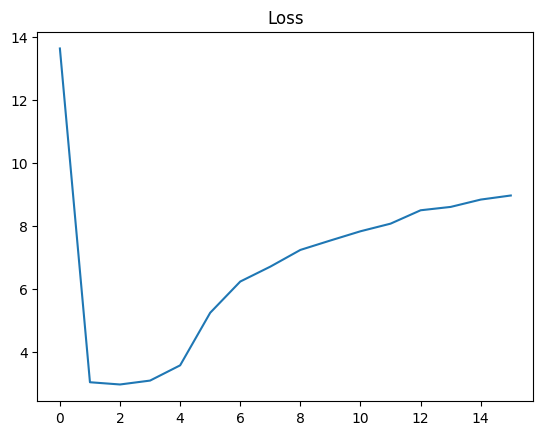

In [110]:
plt.title('Loss')
plt.plot(losses)

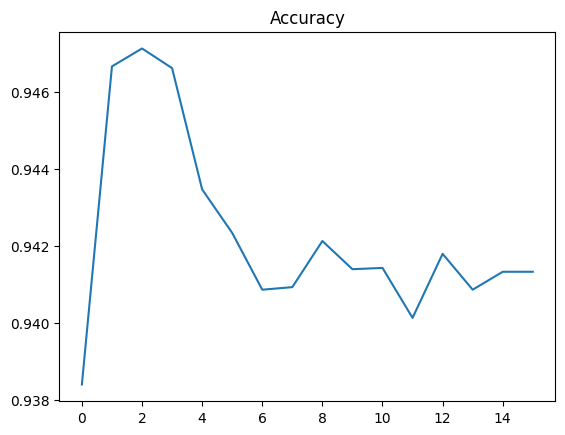

In [111]:
plt.title('Accuracy')
plt.plot(accs)

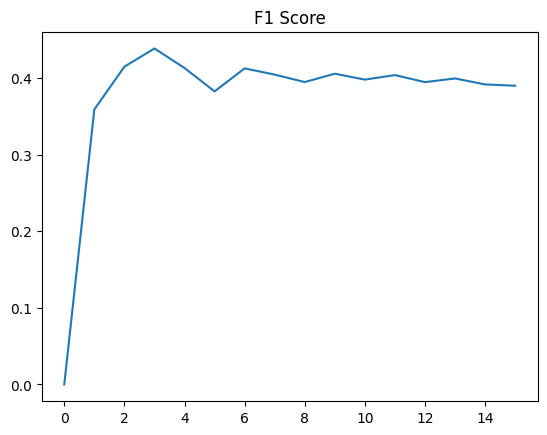

In [112]:
plt.title('F1 Score')
plt.plot(f1s)

## Make Predictions on Example Data

In [113]:
small_df = raw_df.sample(10)

In [114]:
small_df

,qid,question_text,target,char_count,word_count,question_mark
295982,39f4dfd5ac69417c30cf,What is your mindset around money?,0,34,6,True
816985,a0161ebbddf4f20bf7a4,What were the social issues during the Industr...,0,61,9,True
557697,6d45a606bf5462d4f64d,Why do I get diarrhea after eating beef?,0,40,8,True
1281304,fb1d195c86dde745d0c0,What are something we can learn from Chandler ...,0,51,9,True
526860,67266d6c08ac73be6d95,How are heartworms contagious in dogs?,0,38,6,True
794226,9ba1ed29fc2b9bb1e66c,Did you choose not to have children because of...,0,62,10,True
862710,a90a55364f73130b7d18,Should my hosting provider be able to provide ...,0,107,19,True
1069555,d1938a4745005afda16c,What is the first TV show?,0,26,6,True
1218131,eebce72eb7c1e42be236,In what ways do you think your personality has...,0,66,12,True
866270,a9ba83ae0af7219a541a,What are the economic and social benefits of a...,0,110,16,True


In [115]:
def predict_df(df):
  inputs = vectorizer.transform(df.question_text)
  input_tensors = torch.tensor(inputs.toarray()).float()
  outputs = model(input_tensors)
  probs = torch.sigmoid(outputs[:,0])
  preds = (probs > 0.5).int()
  return preds

In [116]:
# predictions
predict_df(small_df)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.int32)

In [117]:
# actual values
small_df.target.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [118]:
small_df.question_text.values

array(['What is your mindset around money?',
       'What were the social issues during the Industrial Revolution?',
       'Why do I get diarrhea after eating beef?',
       'What are something we can learn from Chandler Bing?',
       'How are heartworms contagious in dogs?',
       'Did you choose not to have children because of overpopulation?',
       'Should my hosting provider be able to provide me IP addresses from where an email account was connected to?',
       'What is the first TV show?',
       'In what ways do you think your personality has affected your life?',
       'What are the economic and social benefits of a college hosting an early-entrance-to-college program on campus?'],
      dtype=object)

In [119]:
small_df.question_text[:10]

,question_text
295982,What is your mindset around money?
816985,What were the social issues during the Industr...
557697,Why do I get diarrhea after eating beef?
1281304,What are something we can learn from Chandler ...
526860,How are heartworms contagious in dogs?
794226,Did you choose not to have children because of...
862710,Should my hosting provider be able to provide ...
1069555,What is the first TV show?
1218131,In what ways do you think your personality has...
866270,What are the economic and social benefits of a...


In [120]:
small_df.iloc[9]["question_text"]


'What are the economic and social benefits of a college hosting an early-entrance-to-college program on campus?'

In [121]:
small_df.iloc[4]["question_text"]

'How are heartworms contagious in dogs?'

In [122]:
small_df.iloc[1]["question_text"]

'What were the social issues during the Industrial Revolution?'

In [123]:
def predict_text(text):
  df = pd.DataFrame({'question_text': [text]})
  inputs = vectorizer.transform(df.question_text)
  input_tensors = torch.tensor(inputs.toarray()).float()
  outputs = model(input_tensors)
  probs = torch.sigmoid(outputs[:,0])
  preds = (probs > 0.5).int()
  return preds

In [124]:
predict_text('what is the function of a plasma cell?')

tensor([0], dtype=torch.int32)

In [125]:
predict_text('why cant liberals realize that they are stupid??')

tensor([1], dtype=torch.int32)

In [126]:
predict_text('')

tensor([1], dtype=torch.int32)

In [127]:
predict_text('How does photosynthesis work in plants?')

tensor([0], dtype=torch.int32)

In [128]:
predict_text('Is the moon landing actually fake?')

tensor([0], dtype=torch.int32)

In [129]:
predict_text('When will people stop being so dumb about climate change?')

tensor([0], dtype=torch.int32)

In [130]:
predict_text('Why is the government hiding the truth about aliens?')

tensor([0], dtype=torch.int32)

In [131]:
predict_text('Why do conservatives always ignore facts?')

tensor([1], dtype=torch.int32)

In [132]:
predict_text('Is it possible for flat-earthers to ever use common sense?')

tensor([0], dtype=torch.int32)

In [133]:
predict_text("Why do idiots still believe in climate change?")

tensor([0], dtype=torch.int32)

In [134]:
predict_text('why cant people from west realize that they are selfish??')

tensor([0], dtype=torch.int32)

## Generate Predictions for the Test Set

In [135]:
test_inputs

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2056093 stored elements and shape (375806, 1000)>

In [147]:
import numpy as np

def make_preds(dl):
  all_preds = []
  for batch in dl:
    inputs = batch[0]
    outputs = model(inputs)
    probs = torch.sigmoid(outputs[:,0])
    preds = (probs > 0.5).int()
    all_preds.append(preds.detach().numpy())
  return np.concatenate(all_preds)


In [148]:
test_preds = make_preds(test_dl)

In [149]:
test_preds

array([0, 0, 0, ..., 0, 1, 0], dtype=int32)